In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors
import pylab 
import scipy.stats as stats

[]

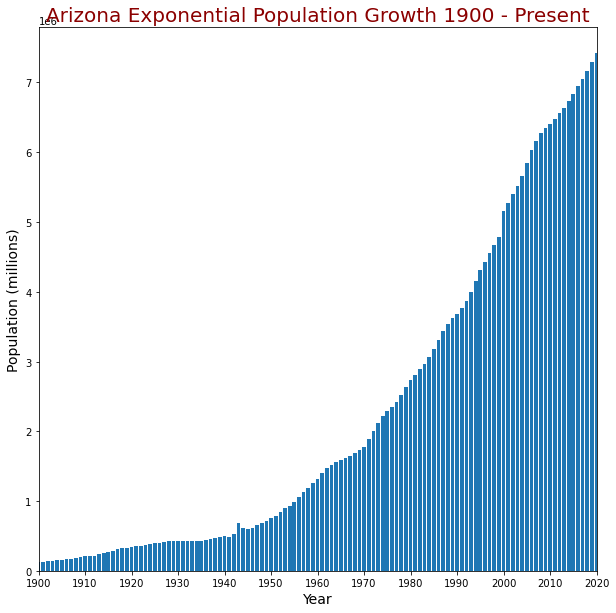

In [26]:
df = pd.read_csv('data/AZpopulationgrowth.csv')
df = df.set_index('date')
df['year'] = np.array(list(range(1900,2021)))


fig, ax = plt.subplots(figsize=(10,10))

ax.bar(df.year,df.Population)
ax.set_xticks(df.year[0::10])
ax.set_xlim(1900,2020)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Population (millions)', fontsize=14)
ax.set_title('Arizona Exponential Population Growth 1900 - Present', fontsize=20, color='darkred')
ax.plot()

#print(df.Population.max())


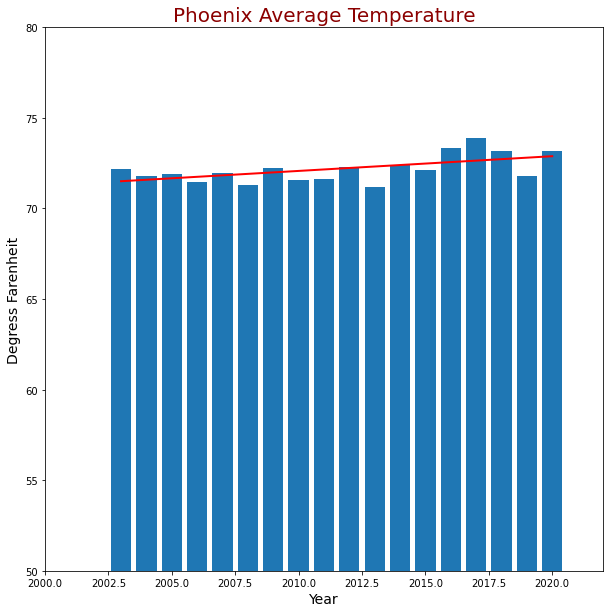

In [6]:
phx = pd.read_csv('data/Phoenix_Weather.csv')

#print(len(phx))
phx = phx[phx.Precipitation != 999]             #clean data remove rows with 999 values
phx['Temp-F'] = phx.Temperature * 9/5 + 32      #put temp into farenheit
phx['Rain'] = phx.Precipitation > 0             #set a column to identify day of rain
phx['Rain-Inch'] = phx.Precipitation * .03937   #put precipitation into inches from mm

phx_temp = phx.groupby('Year')['Temp-F'].mean()

fig, ax = plt.subplots(figsize=(10,10))

ax.bar(phx_temp.index[0:18],phx_temp[0:18])
#ax.set_xticks(df.year[0::10])
ax.set_xlim(2000,2022)
ax.set_ylim(50,80)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Degress Farenheit', fontsize=14)
ax.set_title('Phoenix Average Temperature', fontsize=20, color='darkred')
ax.plot()

#plot a mean line and a best fit line
# Fit line to data using polynomial least squares fit
# x = cols, y= mean_prec
m, b = np.polyfit(phx_temp.index[0:18],phx_temp[0:18], 1) #m = slope, b = intercept #slope = -0.17
ax.plot(phx_temp.index[0:18], m*phx_temp.index[0:18] + b, color='r', lw=2)

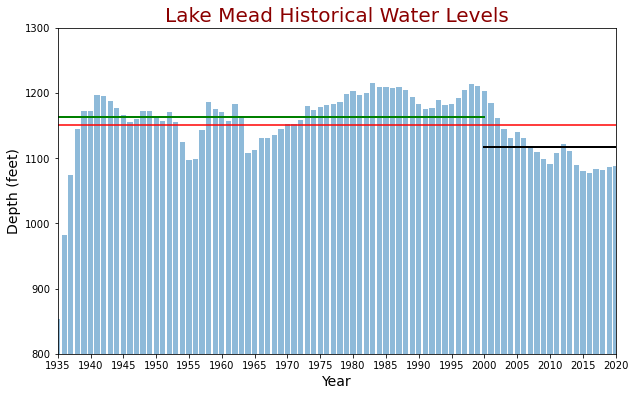

In [18]:
mead = pd.read_csv('data/Lake Meade.csv')
mead = mead.set_index('Year')


mead = mead.apply(pd.to_numeric, errors='coerce')

mead['mean'] = mead.mean(axis=1)

hist_mean = mead['mean'].mean()
hist_mean_2000 = mead['mean'][0:65].mean()
hist_mean_2000_on = mead['mean'][65:].mean()

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(mead.index,mead['mean'],alpha=.5)
ax.set_xticks(list(range(1935,2021,5)))
ax.set_xlim(1935,2020)
ax.set_ylim(800,1300)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Depth (feet)', fontsize=14)
ax.set_title('Lake Mead Historical Water Levels', fontsize=20, color='darkred')
ax.plot()
ax.plot((1935,2020),(hist_mean,hist_mean),c='r', label='historical mean')
ax.plot((1935,2000),(hist_mean_2000,hist_mean_2000),c='g', lw=2, label='1900-1999 mean')
ax.plot((2000,2020),(hist_mean_2000_on,hist_mean_2000_on), c='k', lw=2, label='Recent 20-year mean')

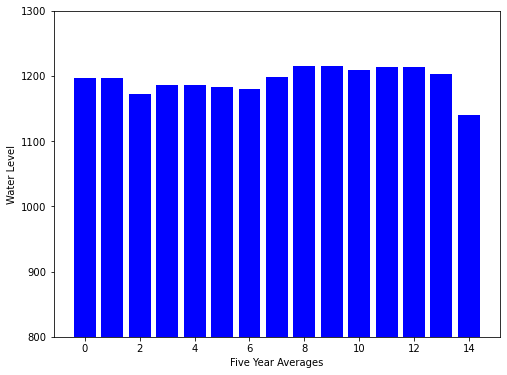

In [59]:
#Lake mead ten year averages
#create 10-year data sets to base our normal distribution on
ten_yr = []
ten_yr_summ = []
mm = mead['mean']

for i in range(0,75,5):
    ten_yr.append(np.array(mm[i:i+10]))

fig, ax = plt.subplots(figsize=(8,6))

for i in range(15):
    period_mean = ten_yr[i].mean()
    stdev = ten_yr[i].std()
    ten_yr_summ.append([period_mean,stdev])
  
    ax.bar(i,ten_yr[i], color='blue')
    ax.set_ylim(800,1300)
    ax.plot()
    ax.set_xlabel('Five Year Averages')
    ax.set_ylabel('Water Level')

  